In [3]:
import pandas as pd
#loading csv
new = pd.read_csv('CSEResults.csv',names=['USN','GPA_new'])
old= pd.read_csv('data_all350.csv',names=['USN','GPA_old'])

In [4]:
#data clean up(removing TAL) ignore top in decirbe as it is sorting the usn and not the gpa
old = old[old.GPA_old != 'TAL']
new = new[new.GPA_new != 'TAL']
print(old.describe())
print(new.describe())

                 USN GPA_old
count            350     350
unique           350     123
top     01FB14ECS008    8.45
freq               1      10
                 USN GPA_new
count            351     351
unique           351     120
top     01FB14ECS008    8.86
freq               1      13


In [5]:
#doing join based on usn
total_data = pd.merge(old,new,on='USN')
total_data['GPA_new'] = total_data['GPA_new'].apply(float)
total_data['GPA_old'] = total_data['GPA_old'].apply(float)
print(total_data.sample())

              USN  GPA_old  GPA_new
105  01FB14ECS246      8.5     8.55


In [6]:
#creating a new column with difference
total_data['diff'] = total_data['GPA_new'] - total_data['GPA_old']
print(total_data.sample())

              USN  GPA_old  GPA_new  diff
130  01FB14ECS122     8.32     8.64  0.32


In [7]:
#printing top 20 gainers
print(total_data.nlargest(20,'diff'))

              USN  GPA_old  GPA_new  diff
342  01FB14ECS112     2.06     3.56  1.50
326  01FB15ECS408     4.32     5.77  1.45
341  01FB14ECS036     2.10     3.15  1.05
296  01FB14ECS174     6.00     7.00  1.00
248  01FB15ECS432     6.68     7.55  0.87
226  01FB14ECS157     7.09     7.91  0.82
260  01FB14ECS016     6.55     7.32  0.77
282  01FB14ECS127     6.23     7.00  0.77
204  01FB14ECS051     7.32     8.05  0.73
217  01FB14ECS219     7.18     7.91  0.73
297  01FB14ECS249     6.00     6.73  0.73
198  01FB14ECS116     7.45     8.18  0.73
238  01FB14ECS301     6.86     7.59  0.73
220  01FB14ECS067     7.14     7.86  0.72
285  01FB15ECS404     6.23     6.95  0.72
312  01FB14ECS142     5.55     6.27  0.72
325  01FB14ECS092     4.36     5.05  0.69
263  01FB15ECS438     6.55     7.23  0.68
284  01FB14ECS259     6.23     6.91  0.68
314  01FB15ECS418     5.32     6.00  0.68


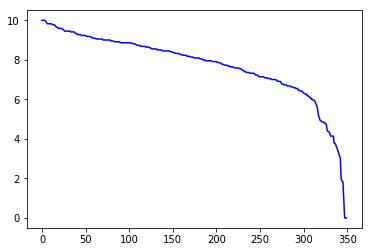

In [14]:
#graphing general gpa trend
import matplotlib.pyplot as plt

plt.plot([g for g in range(len(total_data['GPA_new']))],total_data.sort_values('GPA_new',ascending=False).GPA_new, color='b')
plt.show()

Fequency of difference in GPA


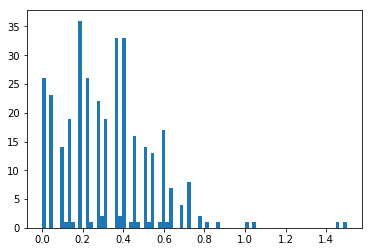

Frequency of New GPA


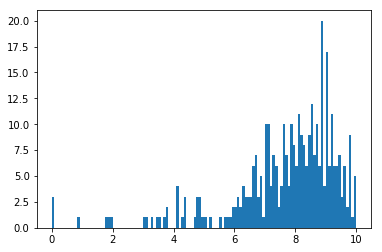

Frequency of Old GPA


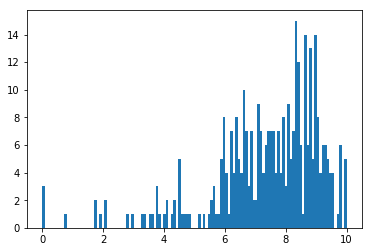

In [9]:
#graphing number of people at each gpa and difference
print('Fequency of difference in GPA')
plt.hist(total_data['diff'],len(total_data.groupby('diff').count().GPA_new))
plt.show()
print('Frequency of New GPA')
plt.hist(total_data['GPA_new'],120)
plt.show()
print('Frequency of Old GPA')
plt.hist(total_data['GPA_old'],123)
plt.show()



In [10]:
# number of people above n

for n in range(5,10):
    print('Number of people above '+str(n)+' : '+str(len(total_data[total_data.GPA_new > n])))

Number of people above 5 : 319
Number of people above 6 : 309
Number of people above 7 : 263
Number of people above 8 : 184
Number of people above 9 : 70


In [11]:
#descriptive stats like mean ,st.dev etc
print('Number of people :' + str(total_data.GPA_new.count()))
print('mean GPA :' + str(total_data.GPA_new.mean()))
print('Standard deviation :'+str(total_data.GPA_new.std()))
print('Variance :'+str(total_data.GPA_new.var()))

Number of people :350
mean GPA :7.71974285714
Standard deviation :1.73557590324
Variance :3.01222371592


In [12]:
#who will get scholarship finding top 20% this is for only declared grades and last few/cuttoff is tenatative
print('Top '+str(int(total_data.GPA_new.count()/5))+' people should get scholarship')
print('Cuttoff : '+str(total_data.sort_values('GPA_new',ascending=False).GPA_new.iloc[67] ))
print()
print('List of people who should get(sorted by gpa)')
for n in range (70):
    print(total_data.sort_values('GPA_new',ascending=False).USN.iloc[n] )

Top 70 people should get scholarship
Cuttoff : 9.05

List of people who should get(sorted by gpa)
01FB14ECS046
01FB14ECS130
01FB14ECS033
01FB14ECS088
01FB14ECS161
01FB14ECS173
01FB14ECS070
01FB14ECS084
01FB14ECS217
01FB14ECS055
01FB14ECS251
01FB14ECS262
01FB14ECS008
01FB14ECS183
01FB14ECS225
01FB14ECS214
01FB14ECS114
01FB14ECS015
01FB14ECS061
01FB14ECS240
01FB14ECS058
01FB14ECS177
01FB14ECS009
01FB14ECS210
01FB14ECS273
01FB14ECS162
01FB14ECS168
01FB14ECS026
01FB14ECS184
01FB14ECS004
01FB14ECS039
01FB14ECS089
01FB14ECS135
01FB14ECS211
01FB14ECS040
01FB14ECS208
01FB14ECS191
01FB14ECS073
01FB14ECS068
01FB14ECS106
01FB14ECS283
01FB14ECS103
01FB14ECS290
01FB14ECS077
01FB14ECS124
01FB14ECS021
01FB14ECS187
01FB14ECS278
01FB14ECS030
01FB14ECS202
01FB14ECS137
01FB14ECS018
01FB14ECS037
01FB14ECS156
01FB14ECS302
01FB14ECS153
01FB14ECS087
01FB14ECS066
01FB14ECS029
01FB14ECS100
01FB14ECS155
01FB14ECS148
01FB14ECS166
01FB14ECS079
01FB14ECS298
01FB14ECS190
01FB14ECS017
01FB14ECS239
01FB14ECS180
01FB1